# Stereoisomer testing on ptree - enantiomers

## Importing section

In [1]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
import sys

sys.path.append("../../")

from ptgnn.features.chienn.molecule3d import smiles_to_3d_mol
from ptgnn.features.chienn.mol_to_data import mol_to_data
from ptgnn.transform import edge_graph_transform, vertex_graph_transform
from ptgnn.model.modules.ptree.complex_ptree_layer import ComplexPtreeLayer

## Define SMILES strings

In [2]:
smiles_list = [
    "C(Br)(Cl)F",
    "[C@H](Br)(Cl)F",
    "[C@@H](Br)(Cl)F",
]

## Visualize and confirm stereomer classification (E/Z)

In [3]:
def showAndChiral(smiles):
    mol = Chem.MolFromSmiles(smiles)
    display(mol)
    print(AllChem.FindMolChiralCenters(mol, includeUnassigned=True))
    for bond in mol.GetBonds():
        if bond.GetBondType() == Chem.rdchem.BondType.DOUBLE:
            print("Bond", bond.GetIdx(), "stereo:", bond.GetStereo())

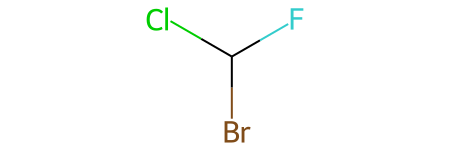

[(0, '?')]


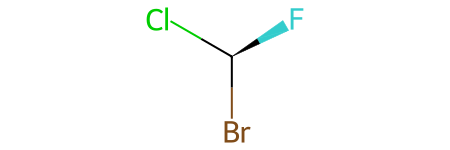

[(0, 'R')]


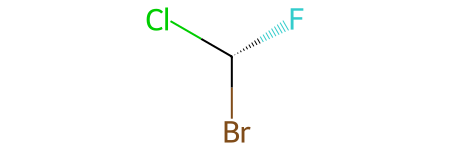

[(0, 'S')]


In [4]:
for smile in smiles_list:
    showAndChiral(smile)

##  Convert to (edge) graph with ptree

In [5]:
# get molecules
mol_list = [
    smiles_to_3d_mol(
        smiles,
        max_number_of_attempts=100,
        max_number_of_atoms=100
    )
    for smiles in smiles_list
]

In [6]:
data_list = [
    mol_to_data(mol)
    for mol in mol_list
]

In [7]:
data_list = [
    vertex_graph_transform(
        data,
        transformation_mode="permutation_tree",
        mol=mol,
        transformation_parameters={
            'k':  3,
            'tetrahedral_chiral': True
        }
    )
    for data, mol in zip(data_list, mol_list)
]

In [8]:
from ptgnn.transform.ptree_matrix import permutation_tree_to_order_matrix

data_list[0].ptree = [
    '{"S": [0, {"P": [1]}]}',
    '{"S": [1, {"P": [{"Z": [2,3,4]}, {"Z": [0,3,4]}, {"Z": [0,2,4]}, {"Z": [0,2,3]}]}]}',
    '{"S": [2, {"P": [1]}]}',
    '{"S": [3, {"P": [1]}]}',
    '{"S": [4, {"P": [1]}]}'
]
data_list[1].ptree = [
    '{"S": [0, {"P": [1]}]}',
    '{"S": [1, {"P": [{"Z": [2,3,4]}, {"Z": [0,3,4]}, {"Z": [0,2,4]}, {"Z": [0,2,3]}]}]}',
    '{"S": [2, {"P": [1]}]}',
    '{"S": [3, {"P": [1]}]}',
    '{"S": [4, {"P": [1]}]}'
]
data_list[2].ptree = [
    '{"S": [0, {"P": [1]}]}',
    '{"S": [1, {"P": [{"Z": [4,3,2]}, {"Z": [4,3,0]}, {"Z": [4,2,0]}, {"Z": [3,2,0]}]}]}',
    '{"S": [2, {"P": [1]}]}',
    '{"S": [3, {"P": [1]}]}',
    '{"S": [4, {"P": [1]}]}'
]
data_list = [
    permutation_tree_to_order_matrix(data, 3)
    for data in data_list
]

In [8]:
from ptgnn.transform.ptree_matrix import permutation_tree_to_order_matrix

data_list[0].ptree = [
    '{"P": [1]}',
    '{"P": [{"Z": [2,3,4]}, {"Z": [0,3,4]}, {"Z": [0,2,4]}, {"Z": [0,2,3]}]}',
    '{"P": [1]}',
    '{"P": [1]}',
    '{"P": [1]}'
]
data_list[1].ptree = [
    '{"P": [1]}',
    '{"P": [{"Z": [2,3,4]}, {"Z": [0,3,4]}, {"Z": [0,2,4]}, {"Z": [0,2,3]}]}',
    '{"P": [1]}',
    '{"P": [1]}',
    '{"P": [1]}'
]
data_list[2].ptree = [
    '{"P": [1]}',
    '{"P": [{"Z": [4,3,2]}, {"Z": [4,3,0]}, {"Z": [4,2,0]}, {"Z": [3,2,0]}]}',
    '{"P": [1]}',
    '{"P": [1]}',
    '{"P": [1]}'
]
data_list = [
    permutation_tree_to_order_matrix(data, 3)
    for data in data_list
]

In [10]:
from ptgnn.transform.ptree_matrix import permutation_tree_to_order_matrix

data_list[0].ptree = [
    '{"P": [0, {"P": [1]}]}',
    '{"P": [1, {"P": [{"Z": [2,3,4]}, {"Z": [0,3,4]}, {"Z": [0,2,4]}, {"Z": [0,2,3]}]}]}',
    '{"P": [2, {"P": [1]}]}',
    '{"P": [3, {"P": [1]}]}',
    '{"P": [4, {"P": [1]}]}'
]
data_list[1].ptree = [
    '{"P": [0, {"P": [1]}]}',
    '{"P": [1, {"P": [{"Z": [2,3,4]}, {"Z": [0,3,4]}, {"Z": [0,2,4]}, {"Z": [0,2,3]}]}]}',
    '{"P": [2, {"P": [1]}]}',
    '{"P": [3, {"P": [1]}]}',
    '{"P": [4, {"P": [1]}]}'
]
data_list[2].ptree = [
    '{"P": [0, {"P": [1]}]}',
    '{"P": [1, {"P": [{"Z": [4,3,2]}, {"Z": [4,3,0]}, {"Z": [4,2,0]}, {"Z": [3,2,0]}]}]}',
    '{"P": [2, {"P": [1]}]}',
    '{"P": [3, {"P": [1]}]}',
    '{"P": [4, {"P": [1]}]}'
]
data_list = [
    permutation_tree_to_order_matrix(data, 3)
    for data in data_list
]

In [11]:
from ptgnn.transform.ptree_matrix import permutation_tree_to_order_matrix

data_list[0].ptree = [
    '{"P": [0, {"P": [1]}]}',
    '{"P": [1, {"P": [{"Z": [2,3,4]}, {"Z": [0,3,4]}, {"Z": [0,2,4]}, {"Z": [0,2,3]}]}]}',
    '{"P": [2, {"P": [1]}]}',
    '{"P": [3, {"P": [1]}]}',
    '{"P": [4, {"P": [1]}]}'
]
data_list[1].ptree = [
    '{"P": [0, {"P": [1]}]}',
    '{"P": [1, {"P": [{"Z": [2,3,4]}, {"Z": [0,3,4]}, {"Z": [0,2,4]}, {"Z": [0,2,3]}]}]}',
    '{"P": [2, {"P": [1]}]}',
    '{"P": [3, {"P": [1]}]}',
    '{"P": [4, {"P": [1]}]}'
]
data_list[2].ptree = [
    '{"P": [0, {"P": [1]}]}',
    '{"P": [1, {"P": [{"Z": [2,4,3]}, {"Z": [0,4,3]}, {"Z": [0,4,2]}, {"Z": [0,3,2]}]}]}',
    '{"P": [2, {"P": [1]}]}',
    '{"P": [3, {"P": [1]}]}',
    '{"P": [4, {"P": [1]}]}'
]
data_list = [
    permutation_tree_to_order_matrix(data, 3)
    for data in data_list
]

In [9]:
from ptgnn.transform.ptree_matrix import permutation_tree_to_order_matrix

data_list[0].ptree = [
    '{"P": [0, {"P": [1]}]}',
    '{"P": [1, {"P": [{"P": [2,3,4]}, {"P": [0,3,4]}, {"P": [0,2,4]}, {"P": [0,2,3]}]}]}',
    '{"P": [2, {"P": [1]}]}',
    '{"P": [3, {"P": [1]}]}',
    '{"P": [4, {"P": [1]}]}'
]
data_list[1].ptree = [
    '{"P": [0, {"P": [1]}]}',
    '{"P": [1, {"P": [{"P": [2,3,4]}, {"P": [0,3,4]}, {"P": [0,2,4]}, {"P": [0,2,3]}]}]}',
    '{"P": [2, {"P": [1]}]}',
    '{"P": [3, {"P": [1]}]}',
    '{"P": [4, {"P": [1]}]}'
]
data_list[2].ptree = [
    '{"P": [0, {"P": [1]}]}',
    '{"P": [1, {"P": [{"P": [2,4,3]}, {"P": [0,4,3]}, {"P": [0,4,2]}, {"P": [0,3,2]}]}]}',
    '{"P": [2, {"P": [1]}]}',
    '{"P": [3, {"P": [1]}]}',
    '{"P": [4, {"P": [1]}]}'
]
data_list = [
    permutation_tree_to_order_matrix(data, 3)
    for data in data_list
]

In [10]:
for data in data_list:
    print(data)
    print(data.ptree)

Data(x=[5, 43], edge_index=[2, 8], edge_attr=[8, 7], pos=[5, 3], ptree=[5], initial_map=[21], layer0_order_matrix=[1], layer0_type_mask=[1], layer0_pooling=[1], num_layer=3, layer1_order_matrix=[1], layer1_type_mask=[1], layer1_pooling=[1], layer2_order_matrix=[1], layer2_type_mask=[1], layer2_pooling=[1])
['{"P": [0, {"P": [1]}]}', '{"P": [1, {"P": [{"P": [2,3,4]}, {"P": [0,3,4]}, {"P": [0,2,4]}, {"P": [0,2,3]}]}]}', '{"P": [2, {"P": [1]}]}', '{"P": [3, {"P": [1]}]}', '{"P": [4, {"P": [1]}]}']
Data(x=[5, 43], edge_index=[2, 8], edge_attr=[8, 7], pos=[5, 3], ptree=[5], initial_map=[21], layer0_order_matrix=[1], layer0_type_mask=[1], layer0_pooling=[1], num_layer=3, layer1_order_matrix=[1], layer1_type_mask=[1], layer1_pooling=[1], layer2_order_matrix=[1], layer2_type_mask=[1], layer2_pooling=[1])
['{"P": [0, {"P": [1]}]}', '{"P": [1, {"P": [{"P": [2,3,4]}, {"P": [0,3,4]}, {"P": [0,2,4]}, {"P": [0,2,3]}]}]}', '{"P": [2, {"P": [1]}]}', '{"P": [3, {"P": [1]}]}', '{"P": [4, {"P": [1]}]}']


## Create Model

In [11]:
from ptgnn.model.modules.ptree.recursive_simple_ptree_layer import RecursiveSimplePtreeLayer

k = 3
# model = RecursiveSimplePtreeLayer( #  ComplexPtreeLayer(
model = ComplexPtreeLayer(
    hidden_dim=43,  #93,
    k=k
)
model

ComplexPtreeLayer(
  (s_layer): ModuleList(
    (0-2): 3 x Linear(in_features=43, out_features=43, bias=True)
  )
  (s_intermediate_layer): Linear(in_features=43, out_features=43, bias=True)
  (s_final_layer): Linear(in_features=43, out_features=43, bias=True)
  (s_elu): ELU(alpha=1.0)
  (z_layer): ModuleList(
    (0-2): 3 x Linear(in_features=43, out_features=43, bias=True)
  )
  (z_intermediate_layer): Linear(in_features=43, out_features=43, bias=True)
  (z_final_layer): Linear(in_features=43, out_features=43, bias=True)
  (z_elu): ELU(alpha=1.0)
  (p_layer): Linear(in_features=43, out_features=43, bias=True)
  (p_elu): ELU(alpha=1.0)
  (p_final_layer): Linear(in_features=43, out_features=43, bias=True)
  (final_elu): ELU(alpha=1.0)
)

## Create batches

In [12]:
from ptgnn.loading.collate import permutation_tree_collation

batch_list = [
    permutation_tree_collation([data])
    for data in data_list
]

In [13]:
# compare output
display(np.array(
    [
        [
            (batch_list[i].x == batch_list[j].x).all()
            for j in range(len(batch_list))
        ]
        for i in range(len(batch_list))
    ]
))

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

## Put batches through model

In [14]:
out_list = [
    model(batch)
    for batch in batch_list
]

## Compare batches

In [15]:
# compare output
display(np.array(
    [
        [
            (out_list[i] == out_list[j]).all()
            for j in range(len(out_list))
        ]
        for i in range(len(out_list))
    ]
))

AttributeError: 'bool' object has no attribute 'all'

In [16]:
# compare sum pooled version itself
display(np.array(
    [
        [
            out_list[i].sum().item() - out_list[j].sum().item()
            for j in range(len(out_list))
        ]
        for i in range(len(out_list))
    ]
) == 0)

AttributeError: 'GlobalStorage' object has no attribute 'sum'

Differentiation between tetrahedral chirality(designed for this purpose)

In [17]:
# compare output
display(np.array(
    [
        [
            (out_list[i].x == out_list[j].x).all()
            for j in range(len(out_list))
        ]
        for i in range(len(out_list))
    ]
))

array([[ True,  True, False],
       [ True,  True, False],
       [False, False,  True]])

In [18]:
# compare sum pooled version itself
display(np.array(
    [
        [
            out_list[i].x.sum().item() - out_list[j].x.sum().item()
            for j in range(len(out_list))
        ]
        for i in range(len(out_list))
    ]
) == 0)

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])